<a href="https://colab.research.google.com/github/sethhardik/SHALA2020/blob/master/Assignment_ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**



---
Importing the required packages


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [2]:
housing_data = california_housing.fetch_california_housing()

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [0]:
df = df[df.Target < 5]

In [0]:
X = df.MedInc
y = df.Target

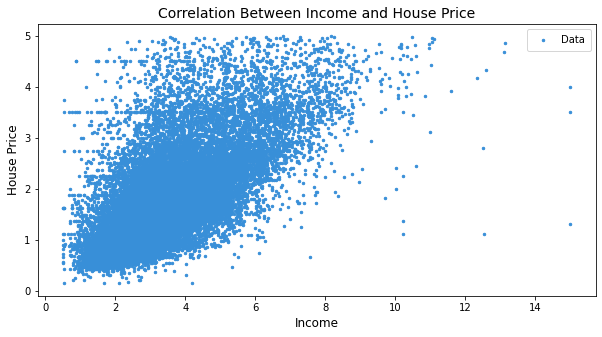

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
  m,b=0.0 , 0.0
  b_grad , m_grad = 0.0 , 0.0
  mse = []
  N = len(X)
  for _ in range(epochs):
    indexes = np.random.randint(0,N,batch_size) # getting random indexes
    Xs = np.take(X,indexes)  # taking feature of these indexes
    ys = np.take(y,indexes)
    M = len(Xs)
    residue = (m * Xs + b) - ys
    b = b - lr * (residue.sum() / M)
    m = m - lr * ((Xs.dot(residue).sum()) / M)
    mse.append(mean_squared_error(y , (m * X + b)))
    
  return m, b, mse

# def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
#   m,b=0.0 , 0.0
#   mse = []
#   N = len(X)
#   for _ in range(epochs):
#     for i in range(N):
#       residue = (m * X[i] + b) - y[i]
#       m = m - lr * residue * X[i]
#       b = b - lr * residue
#       mse.append(mean_squared_error(y , (m * X + b)))
    
#   return m, b, mse

In [0]:
X = np.array(X)
y = np.array(y)
m, b,  mse = SGD(X, y, lr=0.01, epochs=100, batch_size=2)
mse = np.array(mse)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

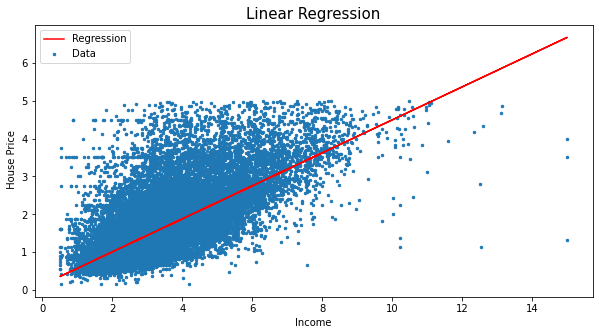

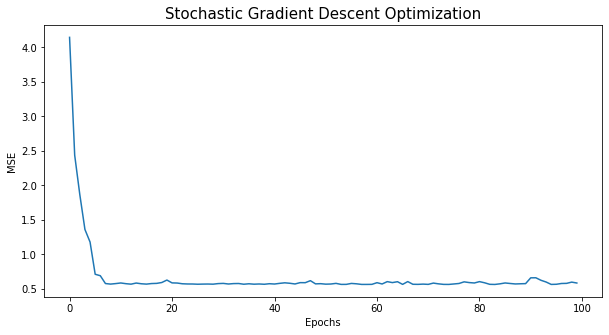

weights:0.43525619374788205,0.1411943540314344
mse:0.6624838513240721


In [13]:
y_pred = m * X + b

plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', s=6)
plt.plot(X, y_pred, c='red', label='Regression')
plt.title('Linear Regression', fontSize=15)
plt.xlabel('Income')
plt.ylabel(' House Price')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(mse)
plt.title('Stochastic Gradient Descent Optimization', fontSize=15)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()
print("weights:{},{}\nmse:{}".format( m , b,mse.mean()))

SVM question in next assignment. Performing Logistic regression.

# Logistic Regression.

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model.logistic import _logistic_loss
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
np.random.seed(2)
data = [[np.random.rand(), np.random.rand()] for i in range(20)]

for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(1)
  else:
    data[i].append(0)

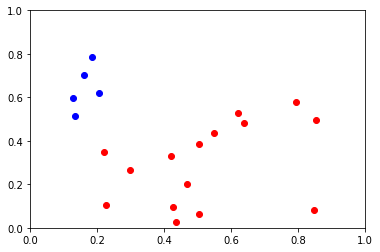

In [0]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)

In [0]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]


In [0]:
print(X.shape)
print(Y.shape)

(20, 2)
(20,)


In [0]:
def loss_log_reg(h,y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def LogisticRegression(x,y,lr = 0.01,epochs=500):

  X = np.zeros((x.shape[0],x.shape[1]+1))
  X[:,1:] = x[:,:2]
  X[:,0] += 1.0
  
  w = np.zeros(X.shape[1])
  loss = []
  residue = 0.0
  
  N = len(Y)
  for _ in range(epochs):
    hypothesis = np.dot(X,w)
    sigmoid = 1.0 / (1.0 + np.exp(-hypothesis))
    loss.append(loss_log_reg(sigmoid,y))
    residue += (sigmoid - y)
    grad = np.dot(X.T,residue) / N
    w -= lr* grad
    
  return w ,loss

In [0]:
w,loss = LogisticRegression(X,Y)

In [0]:
Xtest = np.zeros((X.shape[0],X.shape[1]+1))
Xtest[:,1:] = X[:,:2]
Xtest[:,0] += 1.0


loss = np.array(loss)
y_pred = Xtest.dot(w)
y_l = []

for i in y_pred:
  if i<0.5:
    y_l.append(0.)
  else:
    y_l.append(1.)
y_l = np.array(y_l)

print("Predicted values by the model:",y_l)
print("True values of Y             :",Y)
print("Loss of Logistic Regression  :",loss.mean())
print("Values of weights calculted by model:",w)

Predicted values by the model: [1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
True values of Y             : [1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
Loss of Logistic Regression  : 0.15721421480427195
Values of weights calculted by model: [  4.58749791  34.95784792 -32.8083651 ]


In [0]:
print(loss.shape)

(500,)


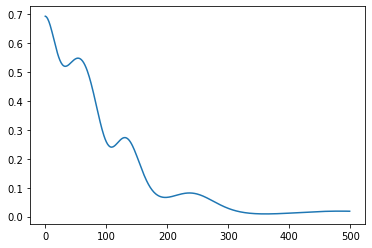

In [0]:
plt.plot(loss)